#  Kickstarter Projects - How to Invest Safely

## 1.)  Introduction and Background

Data from 209,222 projects downloaded from https://webrobots.io/kickstarter-datasets/.  This dataset provides many useful features, including campaign goal, duration, success/failure, category/subcategory, location, title, and associated URLS.

In future analysis, I hope to scrape further to include #images/videos, reward tier system, full project description, etc.

## 2.)  Hypothesis and Strategy

## 3.) Getting Started - Import Libraries, Basic Preprocessing

Data from 209,222 Kickstarter projects.  Data is scraped monthly and placed into a CSV for that given month.  Data can be downloaded from https://webrobots.io/kickstarter-datasets/ (last checked March 2019).

### Imported libraries for data loading, processing, training, and evaluation

In [92]:
## ETL / Data Loading and Transforming ##
import numpy as np
import pandas as pd
import glob
import datetime as dt
import json
from ast import literal_eval

## Tools for Data Visualization ##
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('muted')

## Finally, for final Data Preparation, Model Training, and Model Evaluation ##
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [93]:
## Specifying path to 56 CSV files and loading them all into a single dataframe (~GB) ##

path = r'./Kickstarter Data/Kickstarter_2019-03-14T03_20_12_200Z'

campaigns = pd.concat((pd.read_csv(file) for file in glob.glob(path + "/*.csv")))

## A first look at our dataframe ##
campaigns.head(2)

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,21,2006 was almost 7 years ago.... Can you believ...,"{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",802,US,1387659690,"{""id"":1495925645,""name"":""Daniel"",""is_registere...",USD,$,True,...,new-final-round-album,https://www.kickstarter.com/discover/categorie...,True,False,successful,1391899046,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",802.0,international
1,97,An adorable fantasy enamel pin series of princ...,"{""id"":54,""name"":""Mixed Media"",""slug"":""art/mixe...",2259,US,1549659768,"{""id"":1175589980,""name"":""Katherine"",""slug"":""fr...",USD,$,True,...,princess-pals-enamel-pin-series,https://www.kickstarter.com/discover/categorie...,True,False,successful,1551801611,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",2259.0,international


In [94]:
campaigns.describe()

,backers_count,converted_pledged_amount,created_at,deadline,fx_rate,goal,id,launched_at,pledged,state_changed_at,static_usd_rate,usd_pledged
count,209222.000000,2.092220e+05,2.092220e+05,2.092220e+05,209222.000000,2.092220e+05,2.092220e+05,2.092220e+05,2.092220e+05,2.092220e+05,209222.000000,2.092220e+05
mean,145.419057,1.289290e+04,1.456089e+09,1.463033e+09,0.994857,4.917604e+04,1.073222e+09,1.460206e+09,1.881403e+04,1.462838e+09,1.010757,1.289213e+04
std,885.967976,8.889414e+04,6.339711e+07,6.305618e+07,0.211654,1.179427e+06,6.198051e+08,6.309029e+07,3.229596e+05,6.290421e+07,0.231893,8.890124e+04
min,0.000000,0.000000e+00,1.240366e+09,1.241334e+09,0.008966,1.000000e-02,8.624000e+03,1.240603e+09,0.000000e+00,1.241334e+09,0.008771,0.000000e+00
25%,4.000000,1.060000e+02,1.413317e+09,1.420607e+09,1.000000,1.500000e+03,5.351054e+08,1.417639e+09,1.100000e+02,1.420485e+09,1.000000,1.060014e+02
50%,27.000000,1.537000e+03,1.457895e+09,1.464754e+09,1.000000,5.000000e+03,1.074579e+09,1.461924e+09,1.556000e+03,1.464709e+09,1.000000,1.537358e+03
75%,89.000000,6.548000e+03,1.511595e+09,1.519437e+09,1.000000,1.500000e+04,1.609369e+09,1.516694e+09,6.887200e+03,1.519366e+09,1.000000,6.550000e+03
max,105857.000000,8.596474e+06,1.552527e+09,1.557721e+09,1.876033,1.000000e+08,2.147476e+09,1.552537e+09,8.103074e+07,1.552537e+09,1.716408,8.596475e+06


In [95]:
print('The initial columns in our dataframe are: \n \n', list(campaigns.columns))

The initial columns in our dataframe are: 
 
 ['backers_count', 'blurb', 'category', 'converted_pledged_amount', 'country', 'created_at', 'creator', 'currency', 'currency_symbol', 'currency_trailing_code', 'current_currency', 'deadline', 'disable_communication', 'friends', 'fx_rate', 'goal', 'id', 'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location', 'name', 'permissions', 'photo', 'pledged', 'profile', 'slug', 'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at', 'static_usd_rate', 'urls', 'usd_pledged', 'usd_type']


### 4.)  Basic Data Processing

Workshopping the following columns: 

    1.)  Times are in UNIX format and must be converted to datetime
    2.)  Category, location, and creator_id must be extracted from JSON Dict ~ '{contents}'
           --> Can read string to get dict, but unexpected ""s in entries need to be dealt with separately. 

Note row 350 (id 1455233479) gave me a world of hurt because of "Kat "NomadiKat" Vallera".  Anyone who uses a nickname with quotes messes up the field \*__\*

In [96]:
## Create duration column for number of days project had to acquire goal.  Convert UNIX to normal datetime. ##

campaigns['duration'] = pd.to_datetime(campaigns['deadline'], unit='s').sub(\
    pd.to_datetime(campaigns['launched_at'], unit='s')).dt.days

For now, I'll assign poorly behaved creator entries a creator_id of 0.  Will be easy enough to correct later, but mostly unique creators (157k/209k even with this assignment); thus this column is unlikely to be predictive and won't be used in the analysis.

In [97]:
good_indicies = []
bad_indicies = []

for i in range(len(campaigns)):
    try:
        good_indicies.append(json.loads(campaigns['creator'].values[i])['id'])
    except ValueError:
        bad_indicies.append(i)
    else:
        continue
        
campaigns['creator'].iloc[bad_indicies] = '{"id": 0}'

campaigns['creator_id'] = campaigns['creator'].map(lambda x: json.loads(x)['id'])

## Quickly viewing creators associated with multiple projects. ##
(campaigns[campaigns['creator_id'] != 0].groupby(by = 'creator_id', as_index=True, group_keys=True))['id'].count().sort_values(ascending=False).head(5)

creator_id
2104052526    76
1655558466    61
957058942     59
2039317553    56
1323060510    55
Name: id, dtype: int64

In [98]:
## Initially dropped all duplicates of creator_id == 0 as they were pure copies, but this may not be the case

#duplicates = campaigns.drop_duplicates(['creator_id']).values[campaigns.groupby(by = 'creator_id', as_index=True, group_keys=True)['id'].count() > 1]

#duplicates_without_0 = duplicates[1:]
#duplicates_without_0 = duplicates_without_0[:,-1]

#campaigns.groupby(by = ['creator_id', 'id'], as_index=True, axis=0, group_keys=True).count()[repeat_creators]

#duplicate_table = campaigns[campaigns['creator_id'].isin(duplicates_without_0)]
#duplicate_table.sort_values('creator_id', ascending=False);

Now, extract other relevant information from dataframe, populating new columns that describe where and when a campaign was launched.  

In [99]:
training_rough = campaigns.copy()

training_rough.rename(columns={'state' : 'status'}, inplace=True)

training_rough['sub_id'] = training_rough['category'].map(lambda x: json.loads(x)['id'])
list_of_dicts = training_rough['category'].apply(lambda x: eval(x))

parent_ids = []
rogue_indices = []

for i in range(len(list_of_dicts)):
    try:
        elem = list_of_dicts.ravel()[i]
        parent_ids.append(elem['parent_id'])
    except KeyError:
        rogue_indices.append(i)
        parent_ids.append(0)
    else:
        continue
        
training_rough = training_rough.assign(parent_id = parent_ids)

In [100]:
training_rough['location'].fillna(value='{"name":"Unknown", "state": "Unknown"}', inplace=True)
training_rough['city'] = training_rough['location'].map(lambda x: json.loads(x)['name'])
training_rough['state'] = training_rough['location'].map(lambda x: json.loads(x)['state'])

dates = pd.to_datetime(training_rough['launched_at'], unit='s')

training_rough['weekday_launched'] = dates.map(lambda x: x.weekday())
training_rough['month_launched'] = dates.map(lambda x: x.month)
training_rough['year_launched'] = dates.map(lambda x: x.year)

training_rough['blurb'].fillna(value='None', inplace=True)

training_rough['num_words'] = training_rough['blurb'].map(lambda x: len(x.split()))

We added in num_words of the blub as an extra, albeit basic, feature.  We now dump off the uninteresting columns in preparation for visualization.

In [101]:
kickstarter = training_rough.copy()

cols_to_keep = ['id', 'goal', 'backers_count', 'duration', 'creator_id', 'status', 'usd_pledged',\
                'parent_id', 'sub_id', 'num_words', 'city', 'state', 'weekday_launched', 'year_launched', 'month_launched']
kickstarter = kickstarter[cols_to_keep]
kickstarter = kickstarter.drop_duplicates('id', keep='last')
kickstarter.set_index('id', inplace=True)

kickstarter.goal.count()

182264

### Brief Update and Discussion
Still Need To: 

    1) Handle duplicates, 
    4) Fix missing / mishandled values 
    6) Look into basic NLP to analyze the blurb, 7) Normalize and
        scale the data, 
    10) Critically analyze and improve those models with hyperparameter tuning

## 5.) Visualization of Kickstarter Data

Let's try to visualize project success based on various available features.

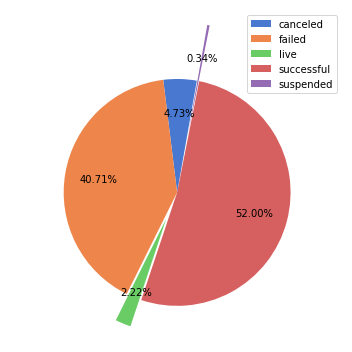

In [102]:
counts = kickstarter.goal.groupby(kickstarter.status).count()
labels = counts.index
pct = 100 * counts / counts.sum()

fig, ax = plt.subplots(figsize=[5,5])
pathces, texts, autotexts = ax.pie(counts, autopct='%1.2f%%', pctdistance=.7, startangle=80, \
                                  explode=[0, 0, .25, 0, .5])

ax.axis('equal')
ax.legend(labels)
plt.tight_layout()
plt.show()

In [103]:
successes = kickstarter[kickstarter['status'] == 'successful']
failures = kickstarter[(kickstarter['status'] == 'failed')]

success_by_category = successes.goal.groupby(successes.parent_id).count()
failure_by_category = failures.goal.groupby(failures.parent_id).count()
total_by_category = kickstarter.count()

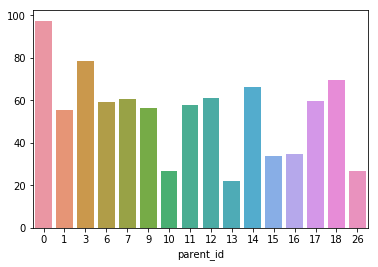

In [104]:
success_rate = []

for category in success_by_category.index:
    rate = success_by_category[category] / (success_by_category[category] + failure_by_category[category])
    success_rate.append(100*rate)
    
success_rate = pd.Series(success_rate, index=success_by_category.index)

sns.barplot(x=success_rate.index, y=success_rate)
plt.show()

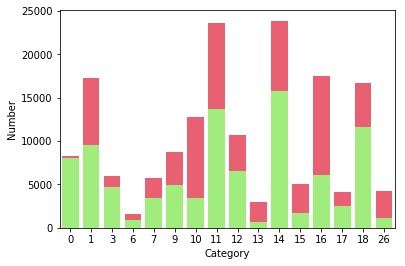

In [105]:
fig, ax1 = plt.subplots()
labels = success_by_category.index

p1 = sns.barplot(x=labels, y=success_by_category, color='#99ff69')
p2 = sns.barplot(x=labels, y=failure_by_category, bottom=success_by_category, color='#ff4960')

plt.ylabel('Number')
plt.xlabel('Category')
plt.show()

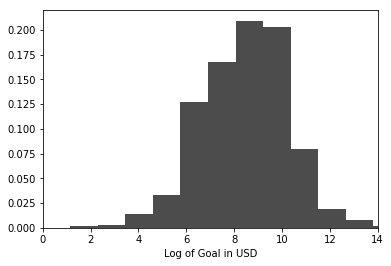

In [106]:
vals = kickstarter['goal'].values
largest = vals.max()

sns.distplot(np.log(vals), bins=20, kde=False, norm_hist=True, kde_kws={'color':'k', 'alpha':0.4},\
             hist_kws={'color':'k', 'linewidth':2, 'alpha':.7})
plt.xlim([0,14])
plt.xlabel('Log of Goal in USD')
plt.show()

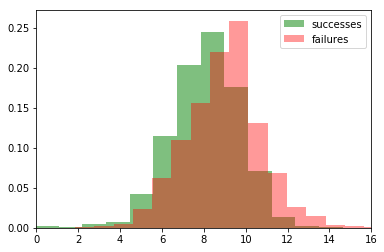

In [107]:
plt.hist(np.log(successes['goal'].values), bins=20, normed=True, alpha=0.5, color='g', label='successes')
plt.hist(np.log(failures['goal'].values), bins=20, normed=True, alpha=0.4, color='r', label='failures')

plt.xlim([0,16])
plt.legend()
plt.show()

We see from the above that goals are smaller for projects that meet success, which is intuitive.  let's check out how they do as portion of goal.

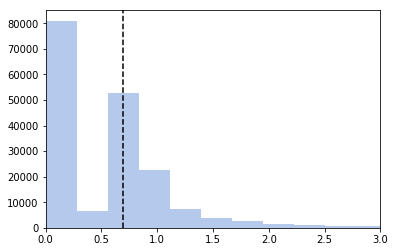

In [108]:
kickstarter['funding_fraction'] = kickstarter['usd_pledged'].div(kickstarter['goal'])
kickstarter['daily_goal'] = kickstarter['goal'].div(kickstarter['duration'])

sns.distplot(np.log(kickstarter['funding_fraction'].values + 1), kde=False, bins=40)
plt.axvline(np.log(2), color='k', linestyle='--')

plt.xlim([0,3])
plt.show()

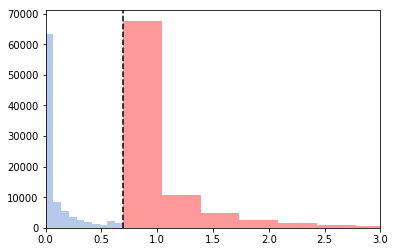

In [109]:
sns.distplot(np.log(kickstarter[(kickstarter['funding_fraction'] >= 0.0) & (kickstarter['funding_fraction'] < 1)] \
                    ['funding_fraction'].values +1),kde=False, bins=10)

sns.distplot(np.log(kickstarter[(kickstarter['funding_fraction'] >= 1)]['funding_fraction'].values +1), \
             kde=False, color='r', bins=30)
plt.axvline(np.log(2), color='k', linestyle='--')

plt.xlim([0,3])
plt.show()

It seems that projects either get very little of their goal or are able to surpass it, which spikes past the halfway point.  At first pass, this is a binary problem: either you succeed or you fail.  Thus, we'll treat this as a problem in binary classification.

### Defining a few convenient functions

In [110]:
def success_rate(df, col):
    
    """ {DataFrame, column} -> {Series}
    
    Takes in a dataframe and the column you wish to sort by and returns the rate of success for each value in that column.
    
    """
    
    mask_of_success = (df['status'] == 'successful')
    successes = df[mask_of_success]
    
    success_by_col = successes.goal.groupby(successes[col]).count()
    total_by_col = df.goal.groupby(df[col]).count()
    
    success_rate = []
    items = success_by_col.index
    
    for item in items:
        try:
            rate = success_by_col[item] / total_by_col[item]
            success_rate.append(100*rate)
        except KeyError:
            rate = 1
        
    success_rate = pd.Series(success_rate, index=items)
    
    return success_rate

In [111]:
def histplot(suc_rate):
    
    sns.distplot(suc_rate, norm_hist=False, kde=False)
    
    return plt.show()

In [112]:
def barplot(suc_rate):
    
    """ {series} -> {bar plot}
    Takes in a series of success rates with category indicies and plots their discrete distributions in a barplot. #
    """
    fix, ax = plt.subplots()
    
    rates = suc_rate.values
    labels = suc_rate.index
    
    sns.barplot(x=labels, y=rates)
    
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    
    plt.tight_layout()
    
    return plt.show()

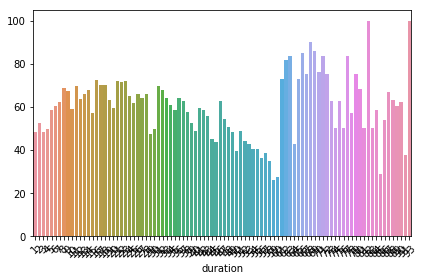

In [113]:
barplot(success_rate(kickstarter, 'duration'))

### Visualizing the Effects of Subcategory

I've been very curious about how a Kickstarer's subcategory influences its chances for success.  Board Games, for instance, appear to have a large, loyal following on Kickstarter and correspondingly high success rates.  Is this a more general trend that can inform and restrict which project categories are safe to support?

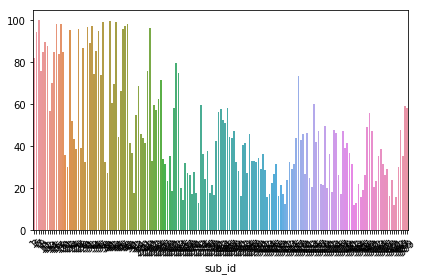

In [114]:
barplot(success_rate(kickstarter, 'sub_id'))

In [115]:
CODES = training_rough['category'].map(lambda x: json.loads(x)['id'])
SUBCATS = training_rough['category'].map(lambda x: json.loads(x)['name'])

sub_id_decoder = dict(zip(CODES, SUBCATS))

In [116]:
top = success_rate(kickstarter, 'sub_id').sort_values(ascending=False)[:10]
top_index = top.index.map(lambda x: sub_id_decoder[x])

bot = success_rate(kickstarter, 'sub_id').sort_values(ascending=True)[1:11]
bot_index = bot.index.map(lambda x: sub_id_decoder[x])

#Notice that 'Web' has 2 different sub_ids that lead to it#

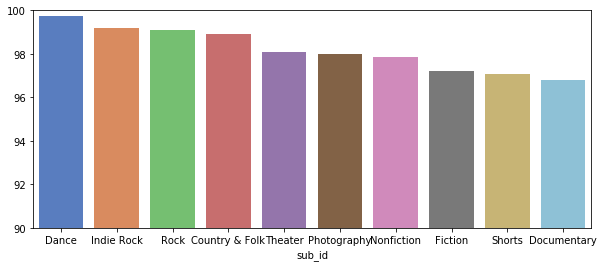

In [117]:
fig, ax = plt.subplots(figsize=[10,4])
sns.barplot(top_index, top)

ax.set_ylim([90,100])

plt.show()

In [118]:
bot = success_rate(kickstarter, 'sub_id').sort_values(ascending=True)[1:11]
bot_index = bot.index.map(lambda x: sub_id_decoder[x])

#Notice that 'Web' has 2 different sub_ids that lead to it#

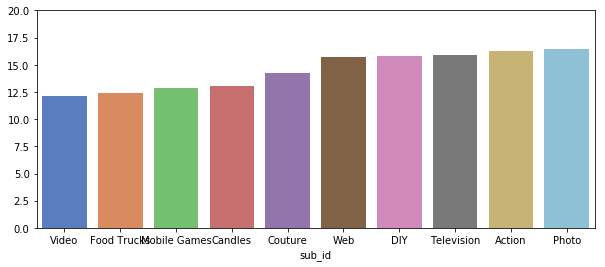

In [119]:
fig, ax = plt.subplots(figsize=[10,4])
sns.barplot(bot_index, bot)

ax.set_ylim([0, 20])

plt.show()

In [120]:
kickstarter['sub'] = kickstarter['sub_id'].map(lambda x: sub_id_decoder[x])

In [121]:
kickstarter[kickstarter['sub_id'].isin(top.index)].groupby('sub_id').mean()

,goal,backers_count,duration,creator_id,usd_pledged,parent_id,num_words,weekday_launched,year_launched,month_launched,funding_fraction,daily_goal
sub_id,,,,,,,,,,,,
6,4653.083295,64.905954,30.887009,1.073149e+09,5150.976462,0.0,18.947226,2.413396,2013.025034,6.018268,1.286618,171.180106
15,7778.520186,131.639752,31.197205,1.094779e+09,16504.027731,0.0,18.687888,2.409938,2015.149068,5.962733,1.836536,245.899089
17,6986.783831,64.203866,29.548330,1.184893e+09,6115.021852,0.0,18.947276,2.446397,2016.321617,5.859402,1.276403,232.420450
30,22796.610000,229.811250,32.125417,1.071664e+09,23838.314282,11.0,19.409167,2.314167,2016.035000,6.448333,5.473377,725.047328
32,8022.962500,65.103750,28.475833,1.041409e+09,6312.870674,11.0,19.378333,2.432917,2015.753333,5.907500,1.371238,274.184743
37,6642.144167,109.533333,31.091667,1.053635e+09,7988.863477,14.0,19.854167,2.480000,2014.770000,6.280000,6.611916,222.089572
40,5446.576250,102.814583,30.434167,1.073613e+09,6669.952614,14.0,19.704583,2.335000,2014.179167,6.470833,7.164833,183.147241
43,5933.778333,97.293750,32.167917,1.089245e+09,6872.888342,14.0,20.030417,2.449167,2014.393750,6.402917,36.328377,191.183057
47,4051.043221,96.035417,30.899167,1.050571e+09,4897.709906,18.0,19.495833,2.395833,2014.581250,6.302500,2.053833,132.547888


In [122]:
kickstarter[kickstarter['sub_id'].isin(bot.index)].groupby('sub_id').mean()

,goal,backers_count,duration,creator_id,usd_pledged,parent_id,num_words,weekday_launched,year_launched,month_launched,funding_fraction,daily_goal
sub_id,,,,,,,,,,,,
265,54970.367089,11.955696,33.680380,1.091717e+09,1407.627039,9.0,18.778481,2.265823,2015.610759,6.227848,0.233405,1750.585453
272,41077.622500,43.321250,32.752917,1.080565e+09,2560.994883,12.0,19.392917,2.444583,2014.822917,6.746667,0.287438,1508.041194
291,301875.533333,48.928655,35.481871,1.155455e+09,3987.150065,11.0,19.535673,2.477193,2015.726316,6.513450,0.547710,6211.017191
303,377049.040834,72.761946,34.500434,1.060631e+09,8403.297633,11.0,19.832320,2.539531,2015.642919,6.306690,3.389536,9503.019161
311,29791.990428,19.649370,35.474559,1.058619e+09,1907.285216,10.0,19.695214,2.498237,2015.618136,6.115365,1.275698,885.980534
343,5775.088123,13.363985,31.300766,1.079444e+09,618.140978,26.0,18.229885,2.431034,2015.856322,6.193487,0.340067,202.620822
345,19473.424084,17.434555,33.016455,1.064919e+09,1184.061884,26.0,18.902019,2.409125,2015.744951,6.570681,0.403309,480.903948
358,18165.132420,20.917808,33.296804,1.052665e+09,1432.408762,13.0,19.529680,2.347032,2015.415525,6.438356,0.401967,510.470036
360,520409.295652,19.921739,33.358696,1.031567e+09,1579.417516,13.0,20.054348,2.482609,2015.552174,6.539130,0.193604,12988.128770


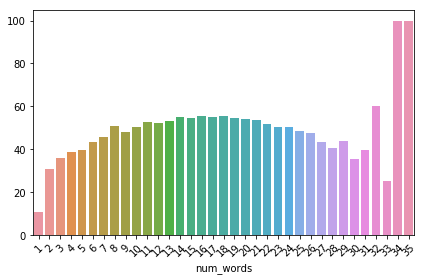

In [123]:
barplot(success_rate(kickstarter, 'num_words'))

In [124]:
kickstarter.groupby('num_words').count().tail()

,goal,backers_count,duration,creator_id,status,usd_pledged,parent_id,sub_id,city,state,weekday_launched,year_launched,month_launched,funding_fraction,daily_goal,sub
num_words,,,,,,,,,,,,,,,,
31,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48
32,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
33,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
34,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
35,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In the case of number of words, neglecting the single measurement for 34 and 35, we see a sweet-spot around 17 to 18 words -- not too long, not too short.

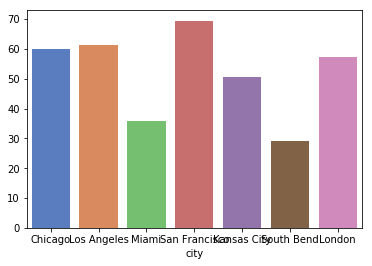

In [125]:
suc = success_rate(kickstarter, 'city')
selection = ['Chicago', 'Los Angeles', 'Miami', 'San Francisco', 'Kansas City', 'South Bend', 'London']
sns.barplot(suc[selection].index, suc[selection].values)
plt.show()

In [126]:
ks_success_agg_by_id = \
kickstarter[kickstarter['status']=='successful'].groupby(['parent_id', 'sub']).agg(['mean', 'count'])

ks_failure_agg_by_id = \
kickstarter[kickstarter['status']=='failed'].groupby(['parent_id', 'sub']).agg(['mean', 'count'])

ks_success_agg_by_id.query('10 < parent_id < 15').head(2)

goal       backers_count         duration        \
                             mean count          mean count       mean count   
parent_id sub                                                                  
11        Action     12673.057554   139    256.266187   139  29.330935   139   
          Animation  50004.903599   778    404.080977   778  33.469152   778   

                       creator_id         usd_pledged        ...  \
                             mean count          mean count  ...   
parent_id sub                                                ...   
11        Action     1.163739e+09   139  18129.921694   139  ...   
          Animation  1.111975e+09   778  30831.754661   778  ...   

                    weekday_launched       year_launched       month_launched  \
                                mean count          mean count           mean   
parent_id sub                                                                   
11        Action            2.532374   139   2015.985612   139       6.582734   
          Animation         2.312339   778   2014.159383   778       6.209512   

                          funding_fraction         daily_goal        
                    count             mean count         mean count  
parent_id sub                                                        
11        Action      139         3.063462   139   422.988053   139  
          Animation   778         9.384973   778  1528.041429   778  

[2 rows x 24 columns]

In [127]:
#parent_id_decoder = {'0': 'Miscellaneous', '11': 'Film', '12': 'Games', '13': 'Media', '14': Music, }

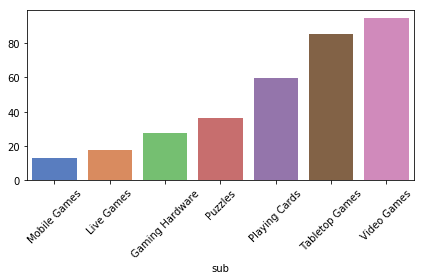

In [128]:
suc = success_rate(kickstarter[kickstarter['parent_id'] == 12], 'sub').sort_values()
labels = suc.index
values = suc.values

barplot(suc)

Below we can see the success rate for various subcategories belonging to the same parent_id associated with Films

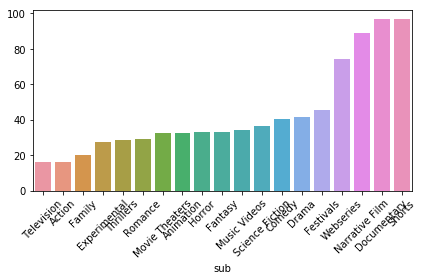

In [129]:
suc = success_rate(kickstarter[kickstarter['parent_id'] == 11], 'sub').sort_values()
labels = suc.index
values = suc.values

barplot(suc)

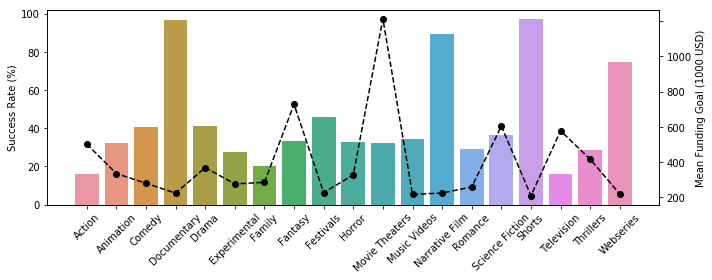

In [130]:
fix, ax1 = plt.subplots(figsize=[10,4])
ax2 = ax1.twinx()
    
suc = success_rate(kickstarter[kickstarter['parent_id'] == 11], 'sub')
labels = suc.index
values = suc.values
mean_goal = kickstarter[kickstarter.parent_id == 11].groupby('sub').agg('mean')['goal']
    
sns.barplot(x=labels, y=values, ax=ax1)
ax2.plot(mean_goal.index, mean_goal.values, marker='o', linestyle='dashed', color='k', label='Mean Goal')
    
for tick in ax1.get_xticklabels():
        tick.set_rotation(45)
        
ax1.set_xlabel('')
ax1.set_ylabel('Success Rate (%)')
ax2.set_ylabel('Mean Funding Goal (1000 USD)')
ax2.set_yticklabels(['0', '200', '400', '600', '800', '1000'], minor=False)

plt.tight_layout()
plt.show()

# Now it's time to scale, normalize, and encode categorical variables

In [131]:
multiple_creator_ids_mask = kickstarter.goal.groupby(kickstarter['creator_id']).count() > 1
kickstarter[kickstarter['creator_id'].isin(multiple_creator_ids_mask)]['creator_id'].nunique()

1

Note that removing all id duplicates (repeat entries) also removed all extra copies of creator_id (with the exception of creator_id 0 which is just an unlabeled creator).  Since it is unique for every data entry, creator_id cannot be predictive so we drop it from our categories.

What about number of backers per month per category?  Is it constant?  Is a rate constant?  Are you competing against your own category?

In [132]:
df_ks = kickstarter.copy()
df_ks = df_ks[df_ks['status'] != 'live']
drop_cols = ['creator_id']
df_ks.drop(columns=drop_cols, inplace=True)
df_ks['status'] = df_ks['status'].apply(lambda x: 1 if x == 'successful' else 0)
#df_ks = df_ks.reset_index().drop(columns='id')

In [133]:
#df_ks_1h = pd.get_dummies(df_ks, prefix=['parent_id', 'sub_id', 'city', 'state'], \
 #                         columns=['parent_id', 'sub_id', 'city', 'state'])

In [134]:
#features = list(df_ks_1h)
#features.remove('status')

In [135]:
#df_ks_1h[features].shape

In [136]:
#df_ks_train = pd.DataFrame(preprocessing.normalize(df_ks_1h[features]))

Rename backers and impute 0 values as 1 so we can do division without trouble.

In [137]:
df_ks.rename(columns={"backers_count":"backers", "usd_pledged": "pledged"}, inplace=True)
df_ks.loc[df_ks['backers'] == 0, 'backers'] = 1

df_ks.loc[:, 'pledge_per_backer'] = df_ks['pledged'] / df_ks['backers']

Create two new columns that place project goal and duration into bins based on the subcategory's distribution.  The last duplicates drop is necessary to get rid of repeated bin edges.

In [138]:
df_ks['goal_pct_by_subcat'] = df_ks.groupby(['sub'])['goal'].transform(lambda x: pd.qcut(x, 3, labels=[1,2,3]))

df_ks['duration_by_subcat'] = df_ks.groupby(['sub'])['duration'].transform(lambda x: pd.qcut(x, 3, labels=False, duplicates='drop'))

Will continue with just a few more engineered metrics to help form the relations: competitors/quarter, competitors/launch month, and avg pledged / backer and success rate per goal, etc in year.

We start by forming the avg number of competitors by month/year for the subcategories in the same goal bucket:

In [139]:
competitors_monthly = df_ks.groupby(['sub', 'month_launched', \
                                      'year_launched', 'goal_pct_by_subcat']).count()

competitors_monthly = competitors_monthly[['status']]
competitors_monthly.reset_index(inplace=True)
competitors_monthly.columns = ['sub', 'month_launched','year_launched', \
                               'goal_pct_by_subcat', 'competitors_monthly']

In [140]:
avg_pledge_by_goal = pd.DataFrame(df_ks.groupby(['sub', 'year_launched', 'goal_pct_by_subcat'])\
                          ['pledge_per_backer', 'funding_fraction'].mean())
avg_pledge_by_goal.reset_index(inplace=True)
avg_pledge_by_goal.columns = ['sub', 'year_launched', 'goal_pct_by_subcat', 'avg_ppb', 'avg_fraction_goal']

Do same thing but based on duration bin rather than goal_amt bin

In [141]:
avg_pledge_by_duration = pd.DataFrame(df_ks.groupby(['sub', 'year_launched', 'duration_by_subcat'])\
                          ['funding_fraction'].mean())
avg_pledge_by_duration.reset_index(inplace=True)
avg_pledge_by_duration.columns = ['sub', 'year_launched', 'duration_by_subcat', 'avg_fraction_dur']

Finally, let's create a reference subcategory average goal so that project goal ambition can be inferred

In [142]:
avg_goal = pd.DataFrame(df_ks.groupby(['sub', 'year_launched', 'duration_by_subcat'])['goal'].mean().astype(int))
avg_goal.reset_index(inplace=True)
avg_goal.columns = ['sub', 'year_launched', 'duration_by_subcat', 'avg_goal']

In [143]:
df_ks['log_goal'] = np.log1p(df_ks['goal'])

df_ks.shape

(178226, 20)

Merging the newly constructed dataframes with the original

In [144]:
df_ks = pd.merge(df_ks, competitors_monthly, on = \
                ['sub', 'year_launched', 'month_launched', 'goal_pct_by_subcat'], how= 'left')

df_ks = pd.merge(df_ks, avg_pledge_by_goal, on = ['sub', 'year_launched', 'goal_pct_by_subcat'], how='left')

df_ks = pd.merge(df_ks,avg_pledge_by_duration, on = ['sub', 'year_launched', 'duration_by_subcat'], how='left')

df_ks = pd.merge(df_ks, avg_goal, on=['sub', 'year_launched', 'duration_by_subcat'], how='left')

In [145]:
df_ks_copy = df_ks.copy()

In [146]:
cols_to_drop = ['backers', 'pledged', 'state', 'city', 'pledge_per_backer', 'sub', 'funding_fraction']

df_ks.drop(cols_to_drop, axis=1, inplace=True)
#df_ks.drop(['funding_fraction'], axis=1, inplace=True)

In [147]:
df_ks_1h = pd.get_dummies(df_ks, prefix=['parent_id', 'sub_id'], \
                         columns=['parent_id', 'sub_id'])

features = list(df_ks_1h)
features.remove('status')
target = ['status']

In [148]:
df_ks_1h_scaled = pd.DataFrame(preprocessing.normalize(df_ks_1h[features]))
df_ks_1h_scaled.columns = list(df_ks_1h[features])

In [149]:
df_ks_1h_scaled.head()

,goal,duration,num_words,weekday_launched,year_launched,month_launched,daily_goal,goal_pct_by_subcat,duration_by_subcat,log_goal,...,sub_id_357,sub_id_358,sub_id_359,sub_id_360,sub_id_361,sub_id_362,sub_id_386,sub_id_387,sub_id_388,sub_id_389
0,0.036296,0.008167,0.004718,0.000363,0.365317,0.002178,0.000807,0.000181,0.000181,0.000962,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.005087,0.000153,0.000112,0.000000,0.010251,0.000015,0.000170,0.000005,0.000000,0.000035,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.347254,0.000174,0.000382,0.000017,0.034968,0.000191,0.034725,0.000035,0.000000,0.000172,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.837298,0.001732,0.000982,0.000173,0.116182,0.000520,0.027910,0.000173,0.000000,0.000553,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.588627,0.001825,0.000530,0.000059,0.118667,0.000353,0.018988,0.000177,0.000059,0.000542,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Training a Random Forest Classifier

In [150]:
X_train, X_test, y_train, y_test = train_test_split(df_ks_1h_scaled[features], df_ks_1h[target])

In [151]:
clf = RandomForestClassifier(n_estimators = 50, criterion = 'gini',\
max_depth = 20, max_features=12)

clf.fit(X_train, y_train);

In [152]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [153]:
print('train accuracy is', accuracy_score(y_train, y_train_pred) \
      ,'and test accuracy is', accuracy_score(y_test, y_test_pred))

train accuracy is 0.8481173645347837 and test accuracy is 0.7858024552819983


In [154]:
feat_importance = pd.DataFrame(list(zip(features, clf.feature_importances_)))

feat_importance.sort_values(1, ascending=False).head()

,0,1
13,avg_fraction_dur,0.154443
12,avg_fraction_goal,0.144507
11,avg_ppb,0.089640
4,year_launched,0.046597
9,log_goal,0.044512


Now we need to scan parameters to optimize our Random Forest and then use a more formal method for determining feature importance (SHAP, permutation, etc)

# Better Random Forest Model (no one-hot encoding)

I try this again without one-hot encoding, which likely hurts tree-based methods

In [155]:
dropping = ['backers', 'pledged', 'state', 'pledge_per_backer', 'sub', 'city', 'funding_fraction']

df_ks_copy.drop(dropping, axis=1, inplace=True)

y = df_ks_copy['status']
X = df_ks_copy.drop('status', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [156]:
clf = RandomForestClassifier(n_estimators = 60, criterion = 'gini',\
max_depth = 15, max_features=7)

RFModel = clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print('train accuracy is', accuracy_score(y_train, y_train_pred) \
      ,'and test accuracy is', accuracy_score(y_test, y_test_pred))

train accuracy is 0.8881041976823347 and test accuracy is 0.7964854007226698


The naive feature importance from our Random Forest Model is given as follows:

In [157]:
feat_importance = pd.DataFrame(list(zip(X, clf.feature_importances_)))

feat_importance.sort_values(1, ascending=False)

,0,1
14,avg_fraction_goal,0.331310
15,avg_fraction_dur,0.160031
3,sub_id,0.114304
16,avg_goal,0.053260
13,avg_ppb,0.046113
8,daily_goal,0.036631
1,duration,0.036204
11,log_goal,0.035980
4,num_words,0.032437
0,goal,0.032272


More robustly, we use permutation importance to better assess feature importance.  This will essentially take into account the effect of mixing up feature values.  The more predictive features should be highly sensitive to interchanging arbitrary rows/entries.

In [158]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(RFModel, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1380 ± 0.0037,avg_fraction_goal
0.0658 ± 0.0028,avg_fraction_dur
0.0169 ± 0.0017,sub_id
0.0125 ± 0.0007,avg_ppb
0.0095 ± 0.0010,avg_goal
0.0086 ± 0.0009,duration
0.0030 ± 0.0004,competitors_monthly
0.0030 ± 0.0009,year_launched
0.0028 ± 0.0014,log_goal
0.0026 ± 0.0011,goal


#Precision, recall, and the corresponding confusion matrix offer a more detailed picture of how our model is actually doing:

In [159]:
Table = confusion_matrix(y_test, y_test_pred)

for line in Table:
    print(*line)

17742 3147
5921 17747


In [160]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80     20889
           1       0.85      0.75      0.80     23668

   micro avg       0.80      0.80      0.80     44557
   macro avg       0.80      0.80      0.80     44557
weighted avg       0.80      0.80      0.80     44557



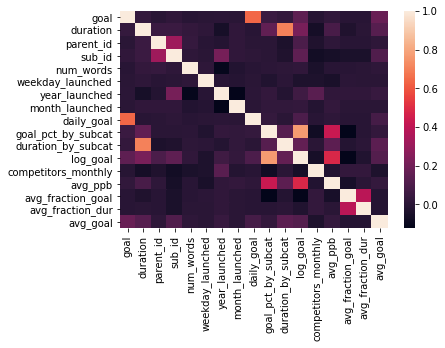

In [161]:
sns.heatmap(X.corr())
plt.show()

# 3-D plot to check for intuitive clustering

Look at a 3D plot with a few important features to see if there's any potential to solve via clustering, or if there are any insights from reducing or increasing the dimensionality of the space.

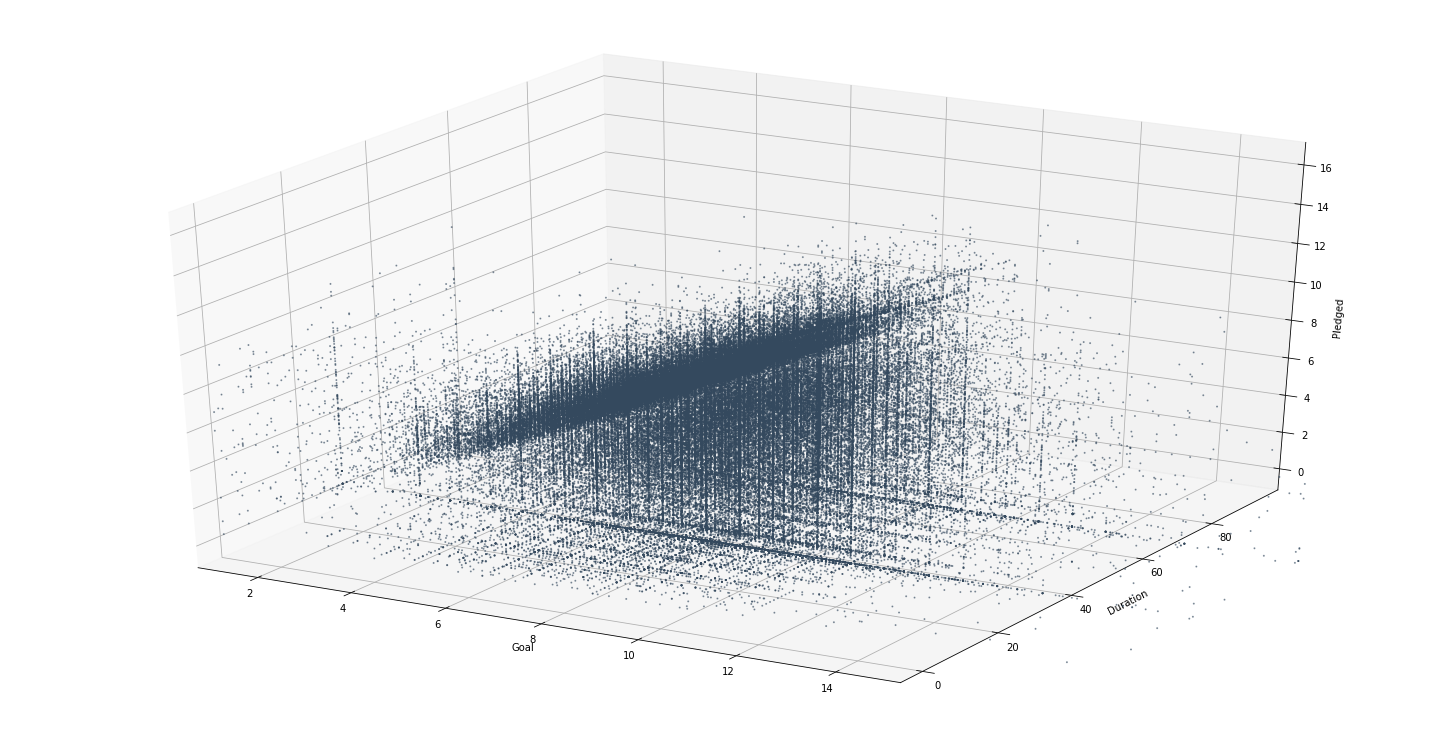

In [87]:
# The following uses the original df_ks without the dropped columns used later for model training

import pylab
from mpl_toolkits.mplot3d import Axes3D

fig = pylab.figure()
fig.set_size_inches(20,10)
ax = Axes3D(fig)

ax.scatter(np.log1p(df_ks.goal), df_ks.duration, np.log1p(df_ks.pledged), color="#34495e", s=1, alpha=0.5)

ax.set_xlabel('Goal')
ax.set_ylabel('Duration')
ax.set_zlabel('Pledged')

ax.set_xlim([1, 15])

plt.show()

# Subcategory success across time

It seems that specific user groups are driven toward Kickstarter and that topics related to those groups do very well.  Let's see if, over the course of the data, Kickstarter's user base has changed.  Let's track if the average goal pct obtained changes over time.

NOTE: Need to find these averages using training data only to prevent data leakage.

In [88]:
mean_funding_fraction = pd.DataFrame(df_ks.groupby(['sub', 'year_launched', 'goal_pct_by_subcat'])\
                          ['funding_fraction'].mean())

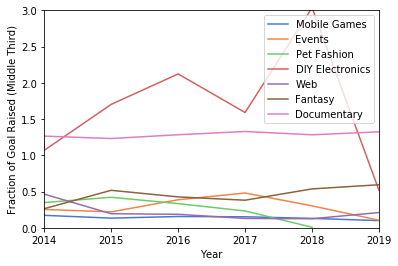

In [89]:
subcategories = ['Mobile Games', 'Events', 'Pet Fashion', 'DIY Electronics', 'Web', 'Fantasy', 'Documentary']
colors = ['blue', 'green', 'red', 'brown', 'purple', 'dark brown', 'light blue']

for subcat, color in zip(subcategories, colors):
    #for i, marker in zip([1, 2, 3], ['.', 'x', '+']):
        df = mean_funding_fraction.loc[subcat].reset_index().query('goal_pct_by_subcat == ' + str(2))
        sns.lineplot(df.year_launched.values, df.funding_fraction.values, label=subcat)
        
plt.ylim([0, 3])
plt.ylabel('Fraction of Goal Raised (Middle Third)')
plt.xlim([2014, 2019])
plt.xlabel('Year')

plt.legend(loc='top middle')
plt.show()

# Perhaps split these over a set of plots, say 4x4 where each subcategory is indicated and its 3 lines are plotted.

In [90]:
mean_funding_fraction.loc['Action'].reset_index().query('goal_pct_by_subcat == 1').year_launched.values

array([2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

In [91]:
mean_funding_fraction.reset_index().query('goal_pct_by_subcat == 2').sort_values('funding_fraction', ascending=False).head()

,sub,year_launched,goal_pct_by_subcat,funding_fraction
1219,Flight,2013,2.0,24.652251
767,DIY Electronics,2013,2.0,17.019119
3053,Technology,2019,2.0,12.404090
764,DIY Electronics,2012,2.0,11.715818
761,DIY Electronics,2011,2.0,11.489342


### What have we learned from this?

If you wish to invest in a Kickstarter, you should stick to the subcategories with recent success and beware of categories that have had difficulty meeting their goals.

Throughout, look for projects with shorter durations and smaller goals.

If interested in creating a Kickstarter project, apart from what has been mentioned above, it seems there is a slight improvement when between 14 and 22 words are used in the description--it shouldn't be too short nor too long.  Adding additional pictures seems to help consistently from preliminary analysis.


This project can be improved by adding in updated Kickstarter data, eliminating data leakage from feature engineering (restricting aggregations to training data), studying model drift, and adding in additional features scraped from Kickstarter (number of pictures, rewards for backers).